In [57]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from experiment_train import *
from experiment_datasets import *
from helpers import *
import matplotlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
# network configuration
N = [1000, 50]

def get_p_arr(p):
    """ p array with failure on the first layer """
    return [0, p]  + [0] * len(N)

# prob. of failure at inference
p_inf = 0.05
p_inference = get_p_arr(p_inf)

# prob. of failure at train
p_trains = np.linspace(0, 1.2 * p_inf, 10)

# Lips. coeff
KLips = 1.

# activation function
activation = 'sigmoid'

# number of repeats for error estimation
# see below for explanation
repetitions = 6

# number of runs for each p
runs = 10

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 1000)              785000    
_________________________________________________________________
dense_110 (Dense)            (None, 50)                50050     
_________________________________________________________________
dense_111 (Dense)            (None, 10)                510       
Total params: 835,560
Trainable params: 835,560
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0629 - categorical_accuracy: 0.7227 - mean_squared_error: 0.0629 - mean_absolute_error: 0.1617 - val_loss: 0.0275 - val_categorical_accuracy: 0.8993 - val_mean_squared_error: 0.0275 - val_mean_absolute_error: 0.1085
Epoch 2/10
60000/60000 [=============================

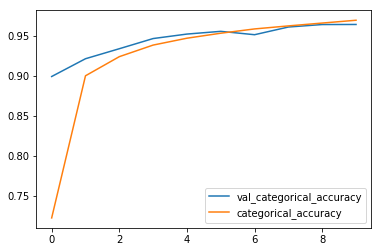

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 1000)              785000    
_________________________________________________________________
Crashes (Lambda)             (None, 1000)              0         
_________________________________________________________________
dense_113 (Dense)            (None, 50)                50050     
_________________________________________________________________
dense_114 (Dense)            (None, 10)                510       
Total params: 835,560
Trainable params: 835,560
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 1000)    

In [41]:
exp = MNISTExperiment(N = N, p_inference = p_inference, p_train = get_p_arr(0), KLips = KLips, epochs = 10,
                                      activation = activation, reg_type = None, reg_coeff = 0, do_print = True,
                                      name = 'experiment_weights', seed = None, batch_size = 100)

1284013.8


(array([3.01451e+05, 2.35387e+05, 1.43602e+05, 6.84170e+04, 2.55650e+04,
        7.50500e+03, 1.72800e+03, 3.07000e+02, 3.20000e+01, 6.00000e+00]),
 array([2.0042201e-07, 2.5734641e-02, 5.1469080e-02, 7.7203520e-02,
        1.0293796e-01, 1.2867241e-01, 1.5440685e-01, 1.8014129e-01,
        2.0587572e-01, 2.3161016e-01, 2.5734460e-01], dtype=float32),
 <a list of 10 Patch objects>)

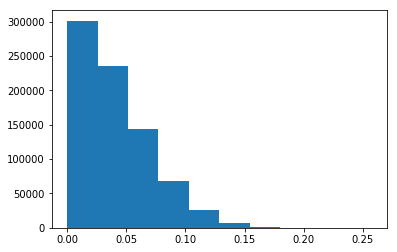

In [42]:
W = np.abs(exp.W[0]).flatten()
print(np.max(W) / np.min(W))
plt.hist(np.abs(W).flatten())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_92 (Dense)             (None, 50)                15050     
_________________________________________________________________
dense_93 (Dense)             (None, 10)                510       
Total params: 251,060
Trainable params: 251,060
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.1050 - categorical_accuracy: 0.8201 - mean_squared_error: 0.0395 - mean_absolute_error: 0.1257 - val_loss: 0.0782 - val_categorical_accuracy: 0.9239 - val_mean_squared_error: 0.0193 - val_mean_absolute_error: 0.0832
Epoch 2/10
60000/60000 [=============================

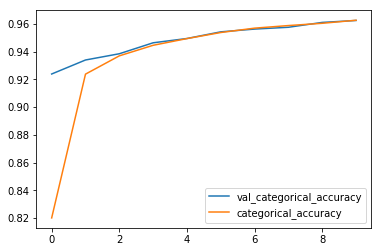

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 300)               235500    
_________________________________________________________________
Crashes (Lambda)             (None, 300)               0         
_________________________________________________________________
dense_95 (Dense)             (None, 50)                15050     
_________________________________________________________________
dense_96 (Dense)             (None, 10)                510       
Total params: 251,060
Trainable params: 251,060
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_97 (Dense)             (None, 300)     

In [31]:
exp = MNISTExperiment(N = N, p_inference = p_inference, p_train = get_p_arr(0), KLips = KLips, epochs = 10,
                                      activation = activation, reg_type = 'l2', reg_coeff = 0.0001, do_print = True,
                                      name = 'experiment_weights', seed = None, batch_size = 100)

2518987.8


(array([1.47484e+05, 6.67150e+04, 1.62040e+04, 3.53600e+03, 8.95000e+02,
        2.55000e+02, 7.00000e+01, 2.60000e+01, 1.00000e+01, 5.00000e+00]),
 array([6.18507840e-08, 1.55801931e-02, 3.11603229e-02, 4.67404537e-02,
        6.23205863e-02, 7.79007152e-02, 9.34808478e-02, 1.09060980e-01,
        1.24641106e-01, 1.40221238e-01, 1.55801371e-01], dtype=float32),
 <a list of 10 Patch objects>)

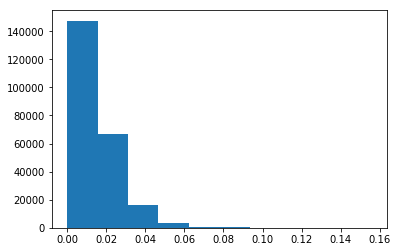

In [32]:
W = np.abs(exp.W[0]).flatten()
print(np.max(W) / np.min(W))
plt.hist(np.abs(W).flatten())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_154 (Dense)            (None, 1000)              785000    
_________________________________________________________________
Crashes (Lambda)             (None, 1000)              0         
_________________________________________________________________
dense_155 (Dense)            (None, 50)                50050     
_________________________________________________________________
dense_156 (Dense)            (None, 10)                510       
Total params: 835,560
Trainable params: 835,560
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 45us/step - loss: 69309.2092 - categorical_accuracy: 0.5038 - mean_squared_error: 0.0743 - mean_absolute_error: 0.1690 - val_loss: 59991.8129 - val_categoric

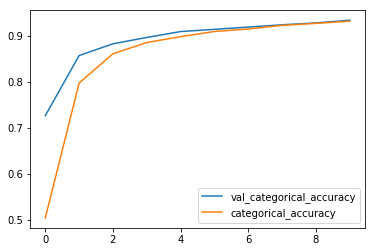

Creating network for 784-dimensional input and 10-dimensional output, with 2 hidden layers
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_157 (Dense)            (None, 1000)              785000    
_________________________________________________________________
Crashes (Lambda)             (None, 1000)              0         
_________________________________________________________________
dense_158 (Dense)            (None, 50)                50050     
_________________________________________________________________
dense_159 (Dense)            (None, 10)                510       
Total params: 835,560
Trainable params: 835,560
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_160 (Dense)            (None, 1000)    

In [51]:
exp = MNISTExperiment(N = N, p_inference = p_inference, p_train = get_p_arr(0.5), KLips = KLips, epochs = 10,
                                      activation = activation, reg_type = 'balanced', reg_coeff = 1e-2, do_print = True,
                                      name = 'experiment_weights', seed = None, batch_size = 100)

1.2124646


(array([ 15.,  39., 130., 228., 244., 176., 104.,  50.,  12.,   2.]),
 array([1.3169051, 1.3448848, 1.3728642, 1.4008439, 1.4288234, 1.456803 ,
        1.4847826, 1.5127621, 1.5407417, 1.5687212, 1.5967008],
       dtype=float32),
 <a list of 10 Patch objects>)

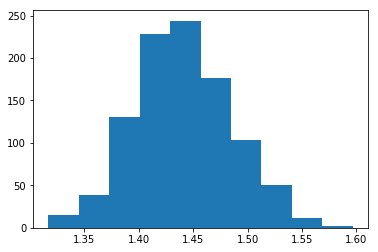

In [56]:
#W = np.abs(exp.W[0]).flatten()
W = np.linalg.norm(exp.W[0], axis = 1)
print(np.max(W) / np.min(W))
plt.hist(np.abs(W).flatten())

In [ ]:
# N, reg_coeff -> q
# repetitions: 5
# Ns: 50 100 500 1000 5000
# qs: mean, std

# Which weights to check? Need to take W[2] maybe?..

N = [1000, 50]

exp = MNISTExperiment(N = N, p_inference = p_inference, p_train = get_p_arr(0.5), KLips = KLips, epochs = 10,
                                      activation = activation, reg_type = 'balanced', reg_coeff = 1e-2, do_print = True,
                                      name = 'experiment_weights', seed = None, batch_size = 100)